<a href="https://colab.research.google.com/github/DivyanshRana1515/Deep-Learning-Lab-/blob/main/Exp_7_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

In [3]:
from google.colab import files

uploaded = files.upload()

Saving mnist_test.csv to mnist_test.csv
Saving mnist_train.csv to mnist_train.csv


In [4]:
# Load training and testing CSVs
train_df = pd.read_csv("mnist_train.csv")
test_df = pd.read_csv("mnist_test.csv")

# First column is the label, rest are pixels
X_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape into (28,28,1) for CNN
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [9]:
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),          # Explicit input
    layers.Conv2D(32, (3,3), activation='relu', name="conv1"),
    layers.MaxPooling2D((2,2), name="pool1"),
    layers.Conv2D(64, (3,3), activation='relu', name="conv2"),
    layers.MaxPooling2D((2,2), name="pool2"),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(
    X_train, y_train,
    epochs=3,               # keep small for demo
    validation_data=(X_test, y_test),
    batch_size=128
)

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 115ms/step - accuracy: 0.8614 - loss: 0.4658 - val_accuracy: 0.9844 - val_loss: 0.0516
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 52s 111ms/step - accuracy: 0.9809 - loss: 0.0601 - val_accuracy: 0.9884 - val_loss: 0.0384
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 104ms/step - accuracy: 0.9881 - loss: 0.0380 - val_accuracy: 0.9885 - val_loss: 0.0363


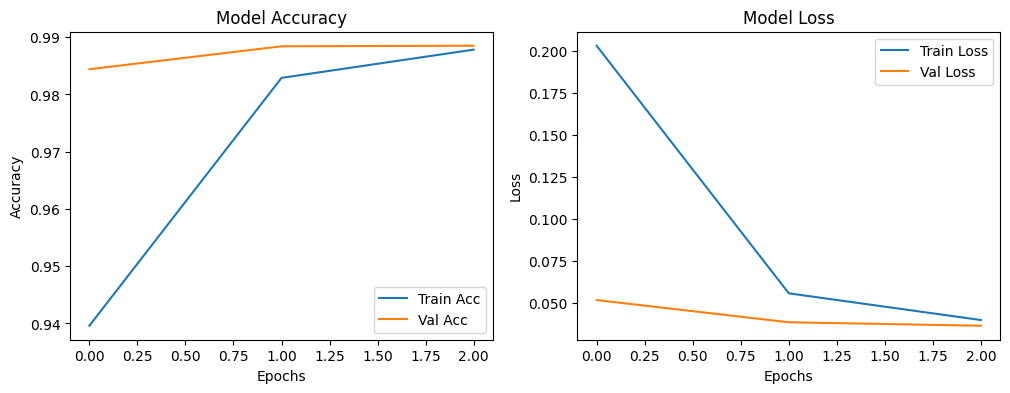

In [12]:
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 55s 112ms/step - accuracy: 0.8521 - loss: 0.5029 - val_accuracy: 0.9794 - val_loss: 0.0637
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 113ms/step - accuracy: 0.9810 - loss: 0.0612 - val_accuracy: 0.9886 - val_loss: 0.0345
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 78s 105ms/step - accuracy: 0.9878 - loss: 0.0391 - val_accuracy: 0.9883 - val_loss: 0.0354


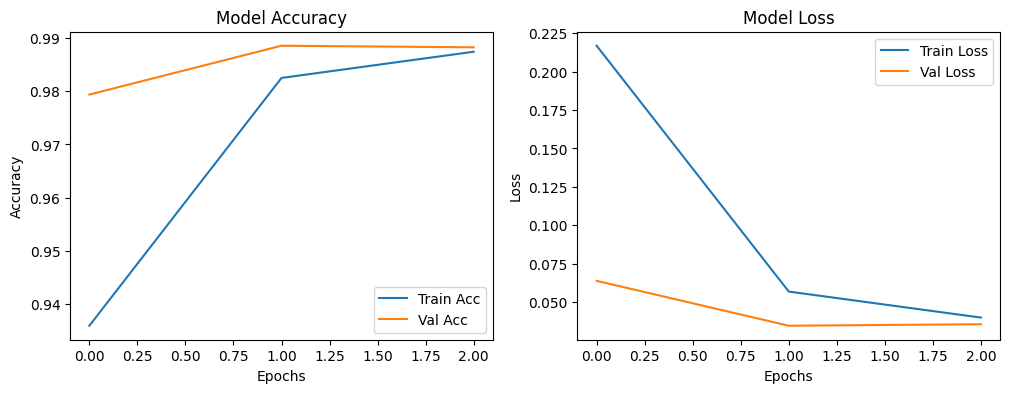


--- Visualizing Feature Maps ---


AttributeError: The layer sequential_1 has never been called and thus has no defined input.

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers

# --- 1. Load Data from CSV ---
# Make sure you have uploaded "mnist_train.csv" and "mnist_test.csv" to your Colab environment
try:
    train_df = pd.read_csv("mnist_train.csv")
    test_df = pd.read_csv("mnist_test.csv")
except FileNotFoundError:
    print("Please upload 'mnist_train.csv' and 'mnist_test.csv' to the Colab session.")
    # You can upload files using the folder icon on the left sidebar.
    exit()


# --- 2. Prepare the Data ---
# First column is the label, rest are pixels
X_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape into (28,28,1) for CNN
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


# --- 3. Build the CNN Model (Corrected) ---
# The fix is here: specify input_shape in the first layer instead of using a separate Input layer.
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1), name="conv1"),
    layers.MaxPooling2D((2,2), name="pool1"),
    layers.Conv2D(64, (3,3), activation='relu', name="conv2"),
    layers.MaxPooling2D((2,2), name="pool2"),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


# --- 4. Train the Model ---
history = model.fit(
    X_train, y_train,
    epochs=3,          # keep small for demo
    validation_data=(X_test, y_test),
    batch_size=128
)


# --- 5. Plot Accuracy and Loss ---
plt.figure(figsize=(12,4))
# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


# --- 6. Visualize Feature Maps (This will now work!) ---
print("\n--- Visualizing Feature Maps ---")

# Select layers for visualization
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name or 'pool' in layer.name]

# Create a new model that outputs these activations
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

# Take the first test image
img = X_test[0].reshape(1,28,28,1)
img_label = y_test[0]

# Display the original image
plt.figure()
plt.title(f"Original Test Image (Label: {img_label})")
plt.imshow(X_test[0].reshape(28,28), cmap='gray')
plt.axis('off')
plt.show()

# Get activations
activations = activation_model.predict(img)

# Plot feature maps
layer_names = [layer.name for layer in model.layers if 'conv' in layer.name or 'pool' in layer.name]

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = min(layer_activation.shape[-1], 16) # limit to 16 maps for display
    size = layer_activation.shape[1]

    # Create a grid to display the feature maps
    n_cols = 4
    n_rows = n_features // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 1.5 * n_rows))
    fig.suptitle(f"Feature Maps from Layer: {layer_name}", fontsize=16)

    for i in range(n_features):
        ax = axes.flat[i]
        ax.imshow(layer_activation[0, :, :, i], cmap='viridis')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)


--- Training the model ---
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.9052 - loss: 0.3199 - val_accuracy: 0.9856 - val_loss: 0.0452
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9843 - loss: 0.0498 - val_accuracy: 0.9885 - val_loss: 0.0338
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9907 - loss: 0.0306 - val_accuracy: 0.9911 - val_loss: 0.0283
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9932 - loss: 0.0217 - val_accuracy: 0.9901 - val_loss: 0.0328
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9952 - loss: 0.0164 - val_accuracy: 0.9926 - val_loss: 0.0246

--- Visualizing Feature Maps ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


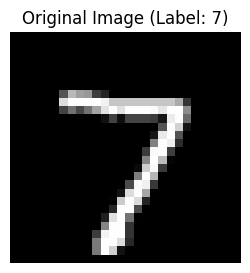

Displaying 32 Feature Maps from the First Convolutional Layer:


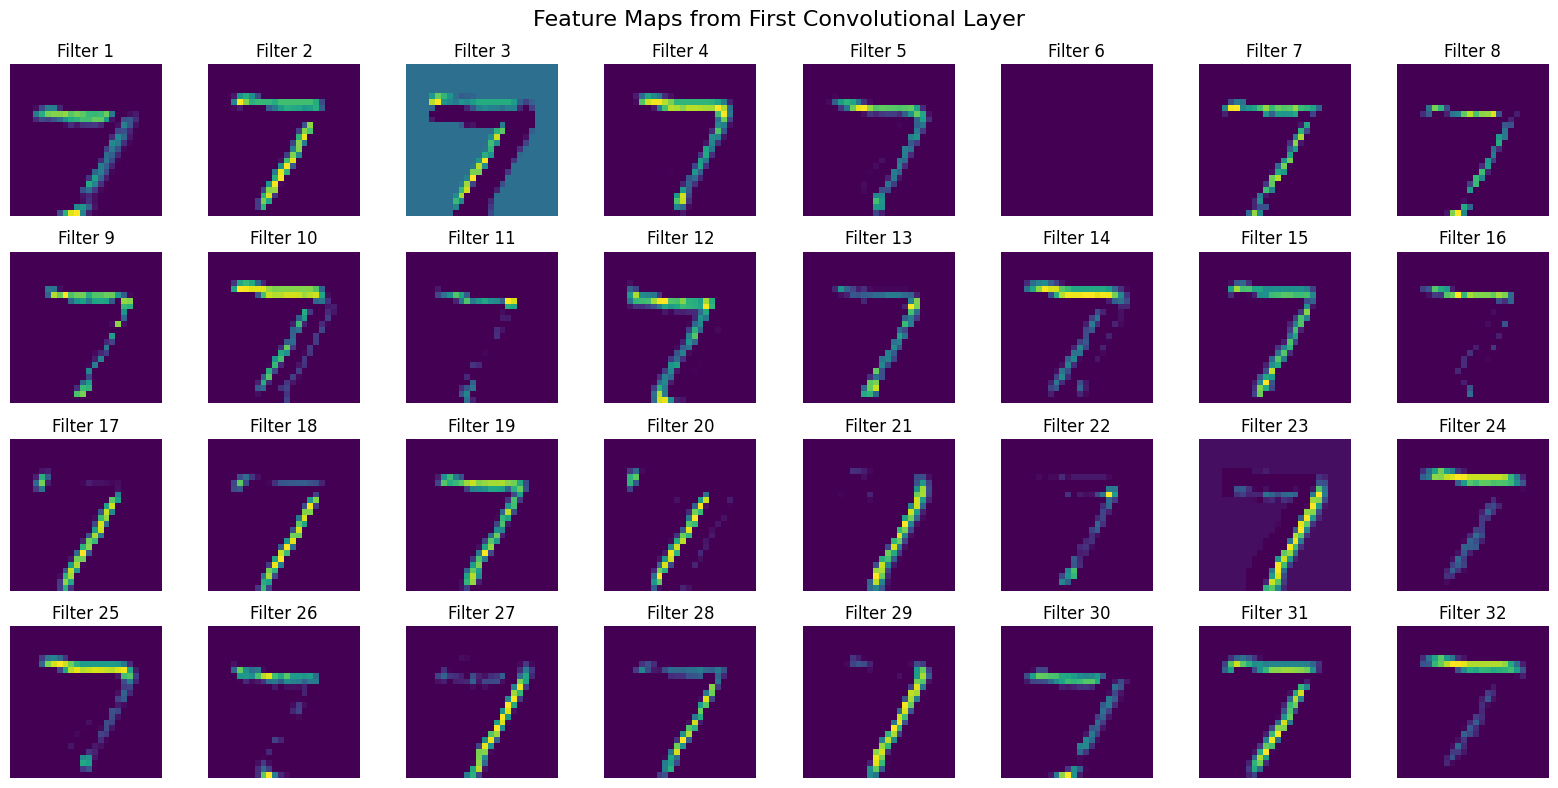

In [15]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Load and Preprocess the MNIST Dataset ---
# Keras has the MNIST dataset built-in, which is easier than loading a CSV.
# It automatically gives us training and testing sets.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the images to have a single channel (since they are grayscale)
# The shape should be (num_samples, height, width, channels)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")


# --- 2. Build the CNN Model ---
model = Sequential([
    # Layer 1: Convolution + Pooling
    # Conv2D(filters, kernel_size, activation, input_shape)
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name='conv1'),
    MaxPooling2D((2, 2), name='pool1'),

    # Layer 2: Convolution + Pooling
    Conv2D(64, (3, 3), activation='relu', name='conv2'),
    MaxPooling2D((2, 2), name='pool2'),

    # Flatten the 2D feature maps into a 1D vector
    Flatten(),

    # A fully connected layer for classification
    Dense(64, activation='relu'),
    Dense(10, activation='softmax') # 10 output neurons for 10 digits (0-9)
])

model.summary()


# --- 3. Compile and Train the Model ---
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model (epochs=5 is quick for a demonstration)
print("\n--- Training the model ---")
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


# --- 4. Visualize the Feature Maps ---
print("\n--- Visualizing Feature Maps ---")

# We want to see the output of the first convolutional layer ('conv1')
# Create a new model that outputs the feature maps from 'conv1'
feature_map_model = Model(inputs=model.inputs, outputs=model.get_layer('conv1').output)

# Select a single image from the test set to visualize
img_to_visualize = x_test[0:1] # Get the first test image
actual_label = y_test[0]

# Get the feature maps for this single image
feature_maps = feature_map_model.predict(img_to_visualize)

# Plot the original image first
plt.figure(figsize=(3,3))
plt.title(f"Original Image (Label: {actual_label})")
plt.imshow(img_to_visualize[0, :, :, 0], cmap='gray')
plt.axis('off')
plt.show()


# Now plot the feature maps
print(f"Displaying {feature_maps.shape[3]} Feature Maps from the First Convolutional Layer:")
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
fig.suptitle("Feature Maps from First Convolutional Layer", fontsize=16)

for i in range(feature_maps.shape[3]):
    ax = axes.flat[i]
    ax.imshow(feature_maps[0, :, :, i], cmap='viridis')
    ax.set_title(f"Filter {i+1}")
    ax.axis('off')

plt.tight_layout()
plt.show()